In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.head()
data = pd.read_csv('../data/earthquake/train_values.csv')
data.head()
combined_data = pd.merge(data, labels, on='building_id')

In [3]:
# initial data analysis
data.info()
labels.info()
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
data_frame = combined_data[['count_floors_pre_eq','damage_grade']]
data_frame.head()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 2 columns):
count_floors_pre_eq    260601 non-null int64
damage_grade           260601 non-null int64
dtypes: int64(2)
memory usage: 6.0 MB


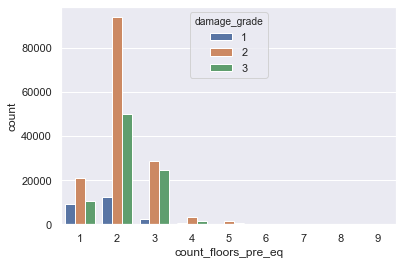

In [5]:
sb.countplot(x='count_floors_pre_eq',hue = 'damage_grade', data=data_frame)

In [6]:
# swarmplot hangs because the number of readings are too huge
# sb.swarmplot(x='damage_grade',y='count_floors_pre_eq',data=data_frame)